## Meta -

This file builds a CNN for the CIFAR 10 dataset, along with showcasing overfitting and how to deal with it

## Author - Rahul Suresh

In [31]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
classes = np.unique(train_labels)
nClasses = len(classes)

In [4]:
nClasses

10

In [5]:
#set the plotter
plt.figure(figsize=[10,5])

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : [9]')

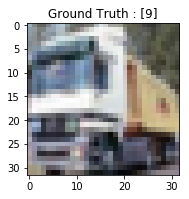

In [6]:
plt.subplot(121)
plt.imshow(train_images[1])
plt.title("Ground Truth : {}".format(train_labels[1]))

In [7]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

In [8]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
train_duplicate=train_data[:300]
train_duplicate_one_hot=train_labels_one_hot[:300]

In [11]:
#how to check shape of output at each time step

In [12]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [13]:
model1 = createModel()

In [14]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [15]:
from keras.utils import plot_model
plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)

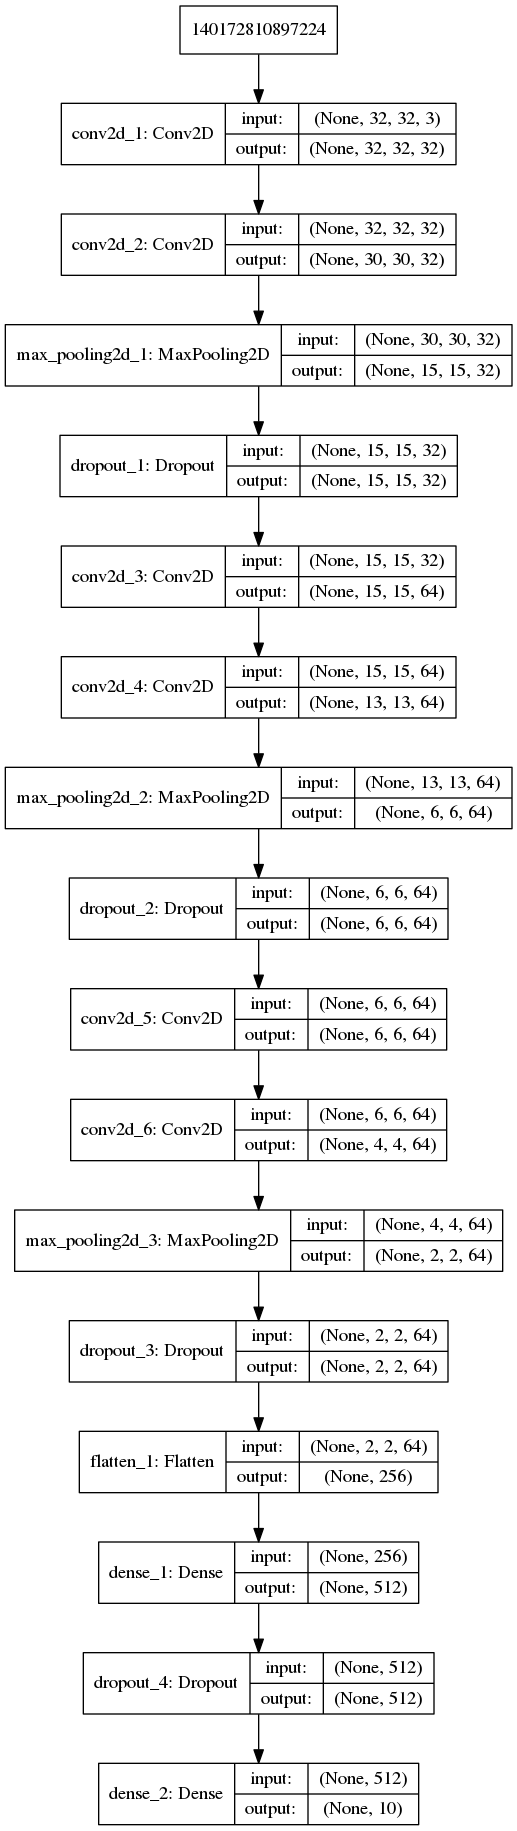

In [16]:
from IPython.display import Image
Image("model1.png")

In [17]:
model1.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [18]:
def train_model(model,reload_filename='NULL',save_best_only=True,batch_size=32,num_epochs=10):
    if(save_best_only):
        checkpointer = ModelCheckpoint(filepath='model-{epoch:02d}-{loss:.4f}.hdf5', verbose=1,monitor='val_acc', save_best_only=True, mode='auto')
    else:
        checkpointer = ModelCheckpoint(filepath='model-{epoch:02d}-{loss:.4f}.hdf5', verbose=1)
    #period option in checkpointer -> after how many epochs to save the model
    if(reload_filename!="NULL"):
            model = load_model(reload_filename)
    history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=num_epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot), callbacks=[checkpointer])
    #model.save(data_path + "final_model.hdf5")
    return history


In [20]:
reload_filename = 'NULL'
history=train_model(model1,batch_size=256, num_epochs=3, reload_filename=reload_filename)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 219s 4ms/step - loss: 0.4697 - acc: 0.8341 - val_loss: 0.5654 - val_acc: 0.8176

Epoch 00001: val_acc improved from -inf to 0.81760, saving model to model-01-0.4697.hdf5
Epoch 2/3
50000/50000 [==============================] - 216s 4ms/step - loss: 0.4697 - acc: 0.8350 - val_loss: 0.5418 - val_acc: 0.8177

Epoch 00002: val_acc improved from 0.81760 to 0.81770, saving model to model-02-0.4697.hdf5
Epoch 3/3
50000/50000 [==============================] - 220s 4ms/step - loss: 0.4570 - acc: 0.8391 - val_loss: 0.5391 - val_acc: 0.8208

Epoch 00003: val_acc improved from 0.81770 to 0.82080, saving model to model-03-0.4570.hdf5


Text(0.5, 1.0, 'Loss Curves')

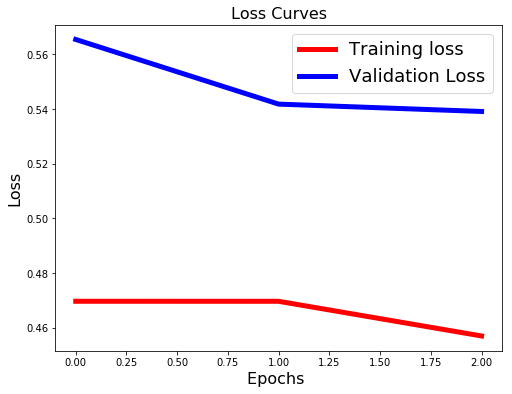

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=5.0)
plt.plot(history.history['val_loss'],'b',linewidth=5.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [22]:
#plt.savefig('foo.png')

Text(0.5, 1.0, 'Accuracy Curves')

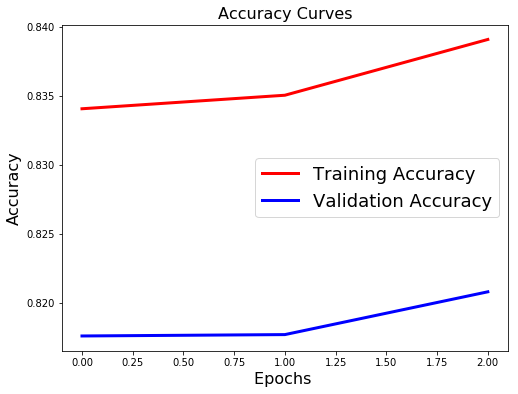

In [23]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [24]:
[test_loss, test_acc] = model1.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 12s 1ms/step


In [25]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 2.3040321769714356, accuracy = 0.0941


In [ ]:
#notice the gap between the training accuracy and validation accuracy is large.
# This suggests overfitting
# But since we have already used dropout
# Lets try data augmentation

In [27]:
model2=createModel()

In [28]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
__________

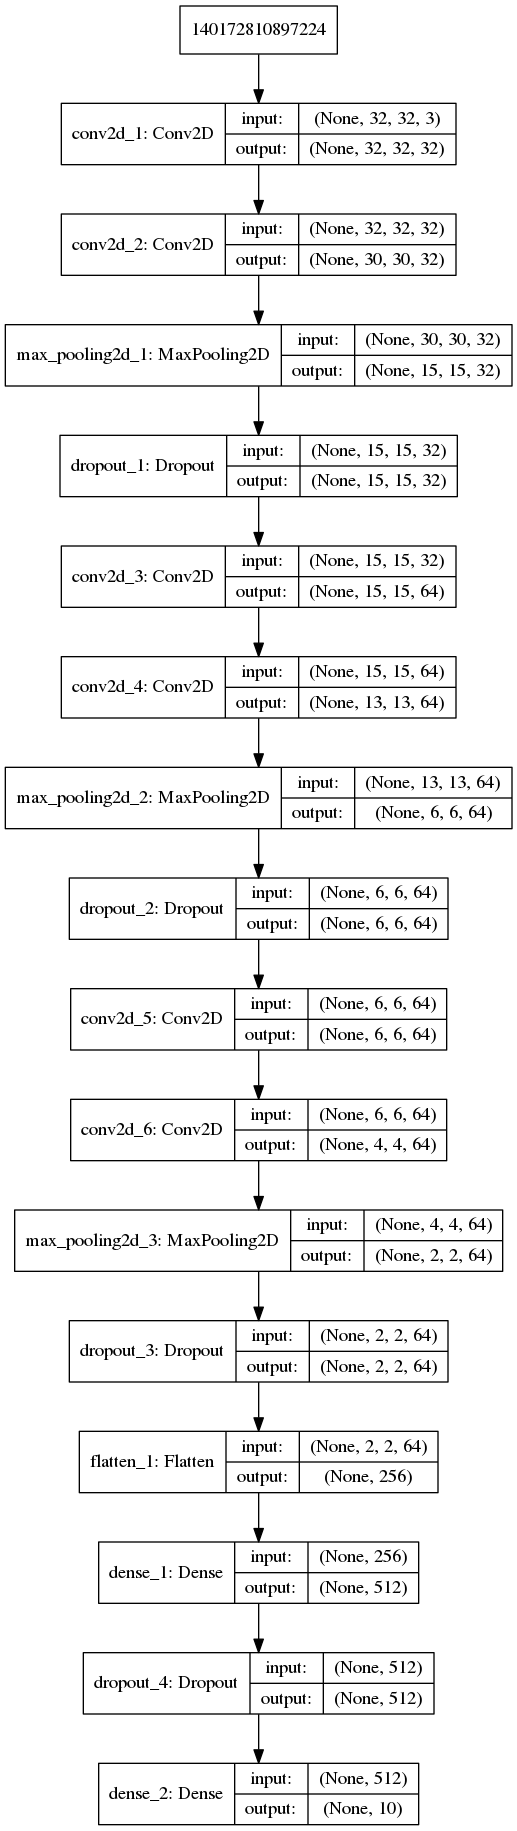

In [29]:
plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)
Image("model1.png")

In [32]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
# fit parameters from data
datagen.fit(train_data)

In [38]:
model2.compile(optimizer='adamax', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [49]:
def train_augmentation_model(model,reload_filename='NULL',save_best_only=True,batch_size=32,num_epochs=10):
    if(save_best_only):
        checkpointer = ModelCheckpoint(filepath='augmodel/model-{epoch:02d}-{loss:.4f}.hdf5', verbose=1,monitor='val_acc', save_best_only=True, mode='auto')
    else:
        checkpointer = ModelCheckpoint(filepath='augmodel/model-{epoch:02d}-{loss:.4f}.hdf5', verbose=1)
    #period option in checkpointer -> after how many epochs to save the model
    if(reload_filename!="NULL"):
            model = load_model(reload_filename)
    #history = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=num_epochs, verbose=1, 
    #               validation_data=(test_data, test_labels_one_hot), callbacks=[checkpointer])
    history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=num_epochs, verbose=1, callbacks=[checkpointer],
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)

    return history

In [ ]:
reload_filename = 'NULL'
history2=train_model(model2,batch_size=256, num_epochs=3, reload_filename=reload_filename)

Text(0.5, 1.0, 'Loss Curves')

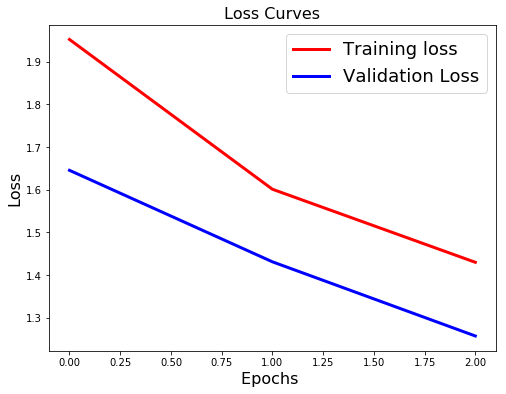

In [42]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

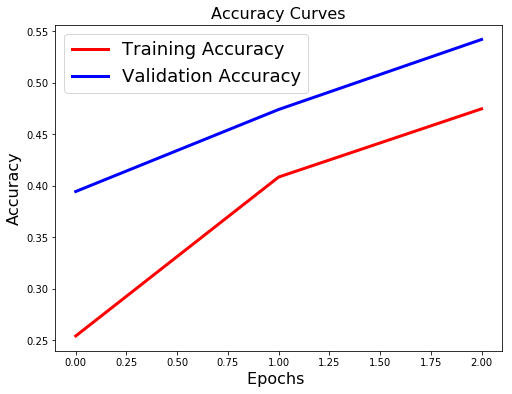

In [43]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [44]:
[test_loss2, test_acc2] = model2.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 12s 1ms/step


In [45]:
print("Evaluation result on Test Data for Image Augmentation model : Loss = {}, accuracy = {}".format(test_loss2, test_acc2))

Evaluation result on Test Data for Image Augmentation model : Loss = 1.2569515014648438, accuracy = 0.5418
